In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
import datetime as dt

*1. Loading the data*

In [3]:
raw_data = pd.read_excel("C:\\Users\\Alejandro\\Desktop\\Alpha Project\\Cursos de python\\Data_Train.xlsx")

In [4]:
df = raw_data.copy(deep = True)

Visualizing the data features information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Data Cleaning
Correcting the dtypes of the dataframe from object to categorical variables.

In [7]:
#df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], dayfirst=True)

def to_datatype(df:pd.DataFrame, df_columns:list, data_type:str)-> pd.DataFrame:
    df[df_columns] = df[df_columns].astype(data_type)
    
    return df

df_columns = ["Airline", "Source", "Destination", "Route", "Additional_Info"]

to_datatype(df=df, df_columns=df_columns, data_type="category")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Airline          10683 non-null  category
 1   Date_of_Journey  10683 non-null  object  
 2   Source           10683 non-null  category
 3   Destination      10683 non-null  category
 4   Route            10682 non-null  category
 5   Dep_Time         10683 non-null  object  
 6   Arrival_Time     10683 non-null  object  
 7   Duration         10683 non-null  object  
 8   Total_Stops      10682 non-null  object  
 9   Additional_Info  10683 non-null  category
 10  Price            10683 non-null  int64   
dtypes: category(5), int64(1), object(5)
memory usage: 569.7+ KB


Then, we consolidate the Date_of_Journey column with the exact time in which the flight departure in a new column "Departure_date"



In [8]:
df["Departure_date"] = df["Date_of_Journey"] + " " + df["Dep_Time"]

df["Departure_date"]

0        24/03/2019 22:20
1         1/05/2019 05:50
2         9/06/2019 09:25
3        12/05/2019 18:05
4        01/03/2019 16:50
               ...       
10678     9/04/2019 19:55
10679    27/04/2019 20:45
10680    27/04/2019 08:20
10681    01/03/2019 11:30
10682     9/05/2019 10:55
Name: Departure_date, Length: 10683, dtype: object

Transform the column dtype into datetime64

In [9]:
df["Departure_date"] = pd.to_datetime(df["Departure_date"], format="%d/%m/%Y %H:%M", dayfirst=True)

df["Departure_date"]

0       2019-03-24 22:20:00
1       2019-05-01 05:50:00
2       2019-06-09 09:25:00
3       2019-05-12 18:05:00
4       2019-03-01 16:50:00
                ...        
10678   2019-04-09 19:55:00
10679   2019-04-27 20:45:00
10680   2019-04-27 08:20:00
10681   2019-03-01 11:30:00
10682   2019-05-09 10:55:00
Name: Departure_date, Length: 10683, dtype: datetime64[ns]

As we have transformed the departure in one column, we proceed to transform the arrival time into one column. The main issue is that when the planes arrives in a different date, it's also indicating the date, so in order to fix this we could so I split the column into three different ones: "Time", "Day" and "Month". as we dont have the year we get the year from the departure date.

In [10]:
arrival_df = df["Arrival_Time"].str.split(expand=True)
arrival_df = arrival_df.rename({0: 'Time', 1: "Day", 2:"Month"}, axis=1)
arrival_df["Year"] = pd.to_datetime(df["Departure_date"]).dt.strftime("%Y")
arrival_df["Arrival_Date"] = (arrival_df["Day"] + "/" + arrival_df["Month"]+ "/" + arrival_df["Year"] + " " +arrival_df["Time"])
arrival_df["Arrival_Date"] = pd.to_datetime(arrival_df["Arrival_Date"], format="%d/%b/%Y %H:%M", dayfirst=True)

arrival_df["Departure_date"] = df["Departure_date"]
arrival_df["Arrival_modified"] = df["Departure_date"].dt.strftime("%Y/%m/%d")
arrival_df["Arrival_modified"] = arrival_df["Arrival_modified"] + " " + arrival_df["Time"]
#pd.DataFrame()
#columns=["Time", "Day", "Month"])
arrival_df


,Time,Day,Month,Year,Arrival_Date,Departure_date,Arrival_modified
0,01:10,22,Mar,2019,2019-03-22 01:10:00,2019-03-24 22:20:00,2019/03/24 01:10
1,13:15,None,None,2019,NaT,2019-05-01 05:50:00,2019/05/01 13:15
2,04:25,10,Jun,2019,2019-06-10 04:25:00,2019-06-09 09:25:00,2019/06/09 04:25
3,23:30,None,None,2019,NaT,2019-05-12 18:05:00,2019/05/12 23:30
4,21:35,None,None,2019,NaT,2019-03-01 16:50:00,2019/03/01 21:35
...,...,...,...,...,...,...,...
10678,22:25,None,None,2019,NaT,2019-04-09 19:55:00,2019/04/09 22:25
10679,23:20,None,None,2019,NaT,2019-04-27 20:45:00,2019/04/27 23:20
10680,11:20,None,None,2019,NaT,2019-04-27 08:20:00,2019/04/27 11:20
10681,14:10,None,None,2019,NaT,2019-03-01 11:30:00,2019/03/01 14:10


We replace the NaT value with the values of the Departure_date.

In [11]:
df["Arrival_date"] = arrival_df.Arrival_Date.fillna(arrival_df.Arrival_modified)





For being usable we will have to transform the duration column into a usable value, as integer. showing the duration of the flight in minutes. As data shows time superior to 24hs it will be more easier to calculate the difference within the departures and the arrival dates in minutes.

In [12]:
duration = (df["Arrival_date"] - df["Departure_date"])
duration = duration/np.timedelta64(1,"m")
df["Duration_minutes"] = duration


In [13]:
Stops = df["Total_Stops"].str.split(" ", expand=True)[0]
df["Stops"] = Stops.replace("non-stop", 0)
df["Stops"] = df["Stops"].astype("float")


#### Routes

In [14]:
#routes = list(df["Route"].str.split(" → "))

#routes[0:]

#for tupla in routes:
#    destination = (tupla[0])

#destination

In [15]:
#routes

In [16]:
#routes = df["Route"].str.split(" → ", expand = True)

In [17]:
#df["Destination_code"] = routes[0]

In [18]:
#df["Destination_code"].unique()

In [19]:
#routes.info()

In [20]:
#routes.isnull().sum()

#### consolidate the DF

In [21]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Departure_date', 'Arrival_date',
       'Duration_minutes', 'Stops'],
      dtype='object')

In [22]:
flights_df = df[['Airline', 'Source', 'Destination', 'Route',
       'Additional_Info', 'Price', 'Departure_date', 'Arrival_date',
       'Duration_minutes', 'Stops']]

In [23]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10683 non-null  category      
 1   Source            10683 non-null  category      
 2   Destination       10683 non-null  category      
 3   Route             10682 non-null  category      
 4   Additional_Info   10683 non-null  category      
 5   Price             10683 non-null  int64         
 6   Departure_date    10683 non-null  datetime64[ns]
 7   Arrival_date      10683 non-null  datetime64[ns]
 8   Duration_minutes  10683 non-null  float64       
 9   Stops             10682 non-null  float64       
dtypes: category(5), datetime64[ns](2), float64(2), int64(1)
memory usage: 486.3 KB


verifying the null values on the dataset.

In [24]:
flights_df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Additional_Info     0
Price               0
Departure_date      0
Arrival_date        0
Duration_minutes    0
Stops               1
dtype: int64

In [25]:
flights_df = flights_df.dropna()
flights_df

,Airline,Source,Destination,Route,Additional_Info,Price,Departure_date,Arrival_date,Duration_minutes,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,2019-03-24 22:20:00,2019-03-22 01:10:00,-4150.0,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,2019-05-01 05:50:00,2019-05-01 13:15:00,445.0,2.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,2019-06-09 09:25:00,2019-06-10 04:25:00,1140.0,2.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,2019-05-12 18:05:00,2019-05-12 23:30:00,325.0,1.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,2019-03-01 16:50:00,2019-03-01 21:35:00,285.0,1.0
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,No info,4107,2019-04-09 19:55:00,2019-04-09 22:25:00,150.0,0.0
10679,Air India,Kolkata,Banglore,CCU → BLR,No info,4145,2019-04-27 20:45:00,2019-04-27 23:20:00,155.0,0.0
10680,Jet Airways,Banglore,Delhi,BLR → DEL,No info,7229,2019-04-27 08:20:00,2019-04-27 11:20:00,180.0,0.0
10681,Vistara,Banglore,New Delhi,BLR → DEL,No info,12648,2019-03-01 11:30:00,2019-03-01 14:10:00,160.0,0.0


# EDA

In [26]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10682 non-null  category      
 1   Source            10682 non-null  category      
 2   Destination       10682 non-null  category      
 3   Route             10682 non-null  category      
 4   Additional_Info   10682 non-null  category      
 5   Price             10682 non-null  int64         
 6   Departure_date    10682 non-null  datetime64[ns]
 7   Arrival_date      10682 non-null  datetime64[ns]
 8   Duration_minutes  10682 non-null  float64       
 9   Stops             10682 non-null  float64       
dtypes: category(5), datetime64[ns](2), float64(2), int64(1)
memory usage: 569.6 KB


As we have a clean dataset to work with, we start to generate the different insights we wanted to get from data.


In [27]:
flights_df.head(4)

,Airline,Source,Destination,Route,Additional_Info,Price,Departure_date,Arrival_date,Duration_minutes,Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,2019-03-24 22:20:00,2019-03-22 01:10:00,-4150.0,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,2019-05-01 05:50:00,2019-05-01 13:15:00,445.0,2.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,2019-06-09 09:25:00,2019-06-10 04:25:00,1140.0,2.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,2019-05-12 18:05:00,2019-05-12 23:30:00,325.0,1.0


In [28]:
flights_df["Duration_minutes"] = abs(flights_df["Duration_minutes"])

From these data we will wanted to know and get some information about some insights.
explorando los datos podemos encontrar lo siguiente:

In [29]:
flights_df.describe()

,Price,Duration_minutes,Stops
count,10682.000000,10682.000000,10682.000000
mean,9087.214567,684.958341,0.824190
std,4611.548810,661.005365,0.675229
min,1759.000000,5.000000,0.000000
25%,5277.000000,170.000000,0.000000
50%,8372.000000,520.000000,1.000000
75%,12373.000000,955.000000,1.000000
max,79512.000000,7835.000000,4.000000


Observando las variables cuantiativas, podemos observar que los precios poseen valores que oscilan desde los 4511 a los 79512. en base a esto podemos intentar detallar de que variable se explica el precio del pasaje.

Para ello podemos observar la evolucion del precio del mismo en base al transcurso del tiempo:
En cuanto al tiempo podemos observar 3 variables. las dos primeras miden un punto fijo en el tiempo, la sotras son la duracion del vuelo.
* Departure date y Arrival Date podrian indicar la presencia de periodos donde los pasajes suben estacionalmente de precios?
* la duracion del vuelo podria indicarnos que mientras mas largo es el vuelo mas caro?

In [30]:
price_df = flights_df[["Price", "Departure_date", "Arrival_date", "Duration_minutes"]]
price_df = price_df.sort_values(by="Departure_date")

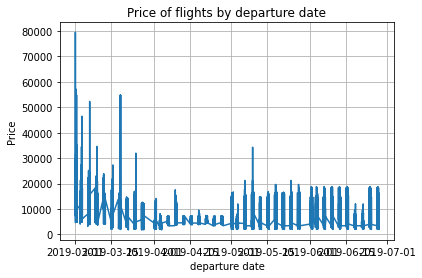

In [31]:
fig, ax = plt.subplots()
ax.plot(price_df["Departure_date"],price_df["Price"], )
ax.set(xlabel='departure date', ylabel='Price',
       title='Price of flights by departure date')
ax.grid()

#fig.savefig("test.png")
plt.show()

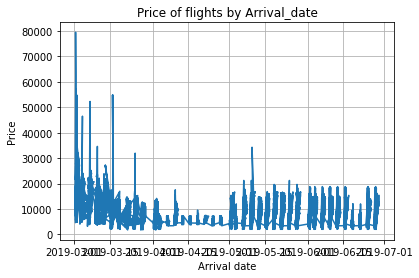

In [32]:
fig, ax = plt.subplots()
ax.plot(price_df["Arrival_date"],price_df["Price"], )
ax.set(xlabel='Arrival date', ylabel='Price',
       title='Price of flights by Arrival_date')
ax.grid()

#fig.savefig("test.png")
plt.show()

La variable duracion nos permite ver cuanto tiempo demora el vuelo, entonces quiza para visualizarlo sea mas sencillo verlo como si se tratase de una variable categorica.

In [33]:
flights_df["Duration_category"] = pd.cut(flights_df["Duration_minutes"], 40)

In [34]:
duration_df = flights_df.groupby(["Duration_category"])["Price"].describe().dropna()
duration_df

,count,mean,std,min,25%,50%,75%,max
Duration_category,,,,,,,,
"(-2.83, 200.75]",3470.0,5027.039769,2091.687185,1759.0,3858.00,4667.0,5678.00,31945.0
"(200.75, 396.5]",1020.0,8921.042157,5389.722217,3480.0,5644.25,7247.0,10844.00,79512.0
"(396.5, 592.25]",1398.0,11121.097997,4417.080480,3673.0,7645.50,10687.0,13941.00,62427.0
"(592.25, 788.0]",1176.0,11287.775510,3952.265083,4487.0,8145.25,10844.0,13938.00,34608.0
"(788.0, 983.75]",1077.0,10665.402971,3769.262219,4227.0,7670.00,10262.0,13292.00,31825.0
"(983.75, 1179.5]",453.0,12082.562914,2857.810613,4647.0,10262.00,12373.0,13882.00,25735.0
"(1179.5, 1375.25]",609.0,12247.638752,3192.785251,5117.0,10262.00,12173.0,13764.00,27430.0
"(1375.25, 1571.0]",683.0,11706.153734,3274.655905,4647.0,9658.00,11467.0,13591.00,31783.0
"(1571.0, 1766.75]",479.0,11620.866388,3007.333340,4487.0,9663.00,11228.0,13342.00,28322.0


In [35]:
duration_df["Duration_count_per"] = duration_df["count"]/duration_df["count"].sum()

In [36]:
duration_df.sort_values(by=["Duration_count_per"], ascending = False)

,count,mean,std,min,25%,50%,75%,max,Duration_count_per
Duration_category,,,,,,,,,
"(-2.83, 200.75]",3470.0,5027.039769,2091.687185,1759.0,3858.00,4667.0,5678.00,31945.0,0.324937
"(396.5, 592.25]",1398.0,11121.097997,4417.080480,3673.0,7645.50,10687.0,13941.00,62427.0,0.130911
"(592.25, 788.0]",1176.0,11287.775510,3952.265083,4487.0,8145.25,10844.0,13938.00,34608.0,0.110123
"(788.0, 983.75]",1077.0,10665.402971,3769.262219,4227.0,7670.00,10262.0,13292.00,31825.0,0.100852
"(200.75, 396.5]",1020.0,8921.042157,5389.722217,3480.0,5644.25,7247.0,10844.00,79512.0,0.095515
"(1375.25, 1571.0]",683.0,11706.153734,3274.655905,4647.0,9658.00,11467.0,13591.00,31783.0,0.063957
"(1179.5, 1375.25]",609.0,12247.638752,3192.785251,5117.0,10262.00,12173.0,13764.00,27430.0,0.057028
"(1571.0, 1766.75]",479.0,11620.866388,3007.333340,4487.0,9663.00,11228.0,13342.00,28322.0,0.044854
"(983.75, 1179.5]",453.0,12082.562914,2857.810613,4647.0,10262.00,12373.0,13882.00,25735.0,0.042420


In [37]:
flights_df["Price_per_minute"] = flights_df["Price"] / flights_df["Duration_minutes"]
flights_df["Price_per_minute"]

0         0.939036
1        17.217978
2        12.177193
3        19.132308
4        46.673684
           ...    
10678    27.380000
10679    26.741935
10680    40.161111
10681    79.050000
10682    23.506000
Name: Price_per_minute, Length: 10682, dtype: float64

A pesar de haber calculado el precio por minuto de duración, esto no toma en cuenta otra variable que podria estar incidiendo en el precio: 
"Additional_Info"

In [38]:
airline_df = flights_df.groupby(["Additional_Info","Airline"])[["Price_per_minute"]].describe()

airline_df


Price_per_minute  \
                                                                          count   
Additional_Info              Airline                                              
1 Long layover               Air India                                      6.0   
                             Jet Airways                                   12.0   
                             SpiceJet                                       1.0   
1 Short layover              Air India                                      1.0   
2 Long layover               Air India                                      1.0   
Business class               Jet Airways                                    1.0   
                             Jet Airways Business                           3.0   
Change airports              Air India                                      7.0   
In-flight meal not included  Jet Airways                                 1886.0   
                             Multiple carriers                             96.0   
No Info                      IndiGo                                         3.0   
No check-in baggage included SpiceJet                                     320.0   
No info                      Air Asia                                     318.0   
                             Air India                                   1736.0   
                             GoAir                                        194.0   
                             IndiGo                                      2050.0   
                             Jet Airways                                 1950.0   
                             Jet Airways Business                           3.0   
                             Multiple carriers                           1100.0   
                             Multiple carriers Premium economy             13.0   
                             SpiceJet                                     497.0   
                             Trujet                                         1.0   
                             Vistara                                      479.0   
                             Vistara Premium economy                        3.0   
Red-eye flight               Air Asia                                       1.0   

                                                                            \
                                                                      mean   
Additional_Info              Airline                                         
1 Long layover               Air India                           13.729264   
                             Jet Airways                         34.359264   
                             SpiceJet                            15.967010   
1 Short layover              Air India                           30.563429   
2 Long layover               Air India                           16.550000   
Business class               Jet Airways                         72.043590   
                             Jet Airways Business               198.081394   
Change airports              Air India                           21.940671   
In-flight meal not included  Jet Airways                         16.384369   
                             Multiple carriers                   15.939516   
No Info                      IndiGo                              28.794008   
No check-in baggage included SpiceJet                            24.939234   
No info                      Air Asia                            21.885080   
                             Air India                           19.557840   
                             GoAir                               22.430292   
                             IndiGo                              25.815790   
                             Jet Airways                         25.169861   
                             Jet Airways Business               123.882222   
                             Multiple carriers                   18.890054   
                      

In [39]:
flights_df["Additional_Info"] = flights_df["Additional_Info"].replace(["No Info"],"No info")
flights_df["Additional_Info"].unique()

['No info', 'In-flight meal not included', 'No check-in baggage included', '1 Short layover', '1 Long layover', 'Change airports', 'Business class', 'Red-eye flight', '2 Long layover']
Categories (9, object): ['1 Long layover', '1 Short layover', '2 Long layover', 'Business class', ..., 'In-flight meal not included', 'No check-in baggage included', 'No info', 'Red-eye flight']

In [40]:
flights_df["Additional_Info"].value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [41]:


additional_df = flights_df.groupby(["Additional_Info"])["Price_per_minute"].agg(["describe", stats.kurtosis, stats.skew])
additional_info_df = pd.DataFrame({"kurtosis" : additional_df.loc[:, ("kurtosis","Price_per_minute")],
                                    "skew": additional_df.loc[:, ("skew","Price_per_minute")]})

additional_info_df = pd.merge(additional_info_df, additional_df["describe"], left_index=True, right_index = True)
additional_info_df.sort_values(by=["count"], ascending=False)

,kurtosis,skew,count,mean,std,min,25%,50%,75%,max
Additional_Info,,,,,,,,,,
No info,6010.433917,71.604330,8347.0,23.280221,40.897577,0.630466,11.305838,20.290625,29.175000,3465.400000
In-flight meal not included,1.797380,1.400065,1982.0,16.362822,11.439124,0.999617,8.015904,12.438788,22.388889,58.764706
No check-in baggage included,2.349758,0.413526,320.0,24.939234,3.216782,15.177778,22.394286,25.307143,26.489655,40.892857
1 Long layover,-1.125665,0.277602,19.0,26.876514,13.414348,8.967260,14.130172,26.668394,36.665791,49.726562
Change airports,-1.299377,0.444082,7.0,21.940671,12.273403,9.411184,11.815433,20.415038,29.993689,40.140230
Business class,-1.179381,-0.530714,4.0,166.571943,70.706509,72.043590,135.061522,180.192679,211.703099,233.858824
1 Short layover,-3.000000,0.000000,1.0,30.563429,NaN,30.563429,30.563429,30.563429,30.563429,30.563429
2 Long layover,-3.000000,0.000000,1.0,16.550000,NaN,16.550000,16.550000,16.550000,16.550000,16.550000
Red-eye flight,-3.000000,0.000000,1.0,65.896970,NaN,65.896970,65.896970,65.896970,65.896970,65.896970


In [42]:
flights_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'Price',
       'Departure_date', 'Arrival_date', 'Duration_minutes', 'Stops',
       'Duration_category', 'Price_per_minute'],
      dtype='object')

In [43]:
no_info_data = flights_df[["Additional_Info", "Price"]].set_index("Additional_Info").filter(like="No info", axis=0)


{'whiskers': [<matplotlib.lines.Line2D at 0x1e15577f730>,
 'caps': [<matplotlib.lines.Line2D at 0x1e15577fcd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e15577f4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e15578b2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e15578b580>],
 'means': []}

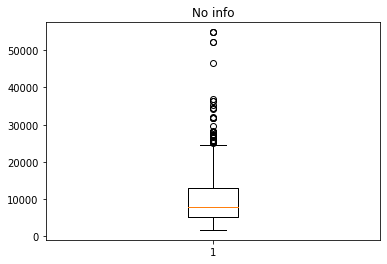

In [44]:
fig1, ax1 = plt.subplots()
ax1.set_title("No info")
ax1.boxplot(no_info_data)

In [45]:
#graph_data = flights_df[["Additional_Info", "Price"]]
#graph_data.set_index("Additional_Info")
#sns.displot(graph_data, x="Price", hue="Additional_Info", kind="kde", fill=True)
#sns.displot(graph_data, x="Price")
#sns.boxplot(graph_data, x="Price")

In [46]:
flights_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'Price',
       'Departure_date', 'Arrival_date', 'Duration_minutes', 'Stops',
       'Duration_category', 'Price_per_minute'],
      dtype='object')

In [47]:
flights_df.pivot_table(index="Duration_category" ,columns="Airline", values="Price_per_minute", aggfunc=["count"])

count                                     \
Airline           Air Asia Air India GoAir IndiGo Jet Airways   
Duration_category                                               
(-2.83, 200.75]        177       416    92   1230         623   
(200.75, 396.5]         45        49    55    394         259   
(396.5, 592.25]         16       108    47    184         538   
(592.25, 788.0]         35       155     0     91         416   
(788.0, 983.75]         42       194     0    133         442   
(983.75, 1179.5]         0        86     0      7         345   
(1179.5, 1375.25]        0       179     0      0         419   
(1375.25, 1571.0]        0       248     0      0         393   
(1571.0, 1766.75]        0       160     0      0         279   
(1766.75, 1962.5]        0        64     0      0          23   
(1962.5, 2158.25]        0         9     0      0          17   
(2158.25, 2354.0]        0        45     0      0          16   
(2354.0, 2549.75]        0         3     0      0           1   
(2549.75, 2745.5]        0         4     0      0           1   
(2745.5, 2941.25]        0         5     0      0           7   
(2941.25, 3137.0]        0         1     0      0          11   
(3137.0, 3332.75]        0         1     0      0          10   
(3332.75, 3528.5]        0         1     0      0           7   
(3528.5, 3724.25]        0         1     0      0          15   
(3724.25, 3920.0]        0         0     0      0           5   
(3920.0, 4115.75]        0         0     0      1           5   
(4115.75, 4311.5]        1         0     0      4           0   
(4311.5, 4507.25]        3         0     0      7           0   
(4507.25, 4703.0]        0         0     0      2           0   
(4703.0, 4898.75]        0         0     0      0           0   
(4898.75, 5094.5]        0         1     0      0           2   
(5094.5, 5290.25]        0         4     0      0           2   
(5290.25, 5486.0]        0         0     0      0           0   
(5486.0, 5681.75]        0         2     0      0           1   
(5681.75, 5877.5]        0         6     0      0           5   
(5877.5, 6073.25]        0         5     0      0           4   
(6073.25, 6269.0]        0         0     0      0           0   
(6269.0, 6464.75]        0         2     0      0           0   
(6464.75, 6660.5]        0         0     0      0           0   
(6660.5, 6856.25]        0         2     0      0           0   
(6856.25, 7052.0]        0         0     0      0           0   
(7052.0, 7247.75]        0         0     0      0           1   
(7247.75, 7443.5]        0         0     0      0           1   
(7443.5, 7639.25]        0         0     0      0           0   
(7639.25, 7835.0]        0         0     0      0           1   

                                                          \
Airline           Jet Airways Business Multiple carriers   
Duration_category                                          
(-2.83, 200.75]                      0                 0   
(200.75, 396.5]                      3                86   
(396.5, 592.25]                      3               459   
(592.25, 788.0]                      0               446   
(788.0, 983.75]                      0               205   
(983.75, 1179.5]                     0                 0   
(1179.5, 1375.25]                    0                 0   
(1375.25, 1571.0]                    0                 0   
(1571.0, 1766.75]                    0                 0   
(1766.75, 1962.5]                    0                 0   
(1962.5, 2158.25]                    0                 0   
(2158.25, 2354.0]                    0                 0   
(2354.0, 2549.75]                    0                 0   
(2549.75, 2745.5]                    0                 0   
(2745.5, 2941.25]                    0                 0   
(2941.25, 3137.0]                    0                 0   
(3137.0, 3332.75]                    0                 0   
(3332.75, 3528.5]        

In [48]:
flights_df.pivot_table(index="Duration_category" ,columns="Airline",values="Price", aggfunc=["mean"])

mean                                           \
Airline               Air Asia     Air India        GoAir        IndiGo   
Duration_category                                                         
(-2.83, 200.75]    4487.502825   5645.915865  4726.173913   4726.933333   
(200.75, 396.5]    7162.911111   9021.877551  7144.872727   6529.845178   
(396.5, 592.25]    6931.937500  10054.462963  6580.191489   7852.652174   
(592.25, 788.0]    6794.771429   9748.541935          NaN   7680.373626   
(788.0, 983.75]    7121.952381  10609.175258          NaN   7239.443609   
(983.75, 1179.5]           NaN  11635.767442          NaN  10018.571429   
(1179.5, 1375.25]          NaN  11280.899441          NaN           NaN   
(1375.25, 1571.0]          NaN  11043.528226          NaN           NaN   
(1571.0, 1766.75]          NaN  11346.437500          NaN           NaN   
(1766.75, 1962.5]          NaN  12570.687500          NaN           NaN   
(1962.5, 2158.25]          NaN  12681.000000          NaN           NaN   
(2158.25, 2354.0]          NaN  11489.822222          NaN           NaN   
(2354.0, 2549.75]          NaN  12114.333333          NaN           NaN   
(2549.75, 2745.5]          NaN  10585.500000          NaN           NaN   
(2745.5, 2941.25]          NaN   6862.600000          NaN           NaN   
(2941.25, 3137.0]          NaN   5092.000000          NaN           NaN   
(3137.0, 3332.75]          NaN  12568.000000          NaN           NaN   
(3332.75, 3528.5]          NaN   6955.000000          NaN           NaN   
(3528.5, 3724.25]          NaN   6955.000000          NaN           NaN   
(3724.25, 3920.0]          NaN           NaN          NaN           NaN   
(3920.0, 4115.75]          NaN           NaN          NaN   6575.000000   
(4115.75, 4311.5]  3383.000000           NaN          NaN   4978.750000   
(4311.5, 4507.25]  5147.000000           NaN          NaN   5334.857143   
(4507.25, 4703.0]          NaN           NaN          NaN  10286.000000   
(4898.75, 5094.5]          NaN   8767.000000          NaN           NaN   
(5094.5, 5290.25]          NaN  10443.750000          NaN           NaN   
(5486.0, 5681.75]          NaN  11717.500000          NaN           NaN   
(5681.75, 5877.5]          NaN   9696.666667          NaN           NaN   
(5877.5, 6073.25]          NaN  11051.200000          NaN           NaN   
(6269.0, 6464.75]          NaN  11869.500000          NaN           NaN   
(6660.5, 6856.25]          NaN   9952.500000          NaN           NaN   
(7052.0, 7247.75]          NaN           NaN          NaN           NaN   
(7247.75, 7443.5]          NaN           NaN          NaN           NaN   
(7639.25, 7835.0]          NaN           NaN          NaN           NaN   

                                                                        \
Airline             Jet Airways Jet Airways Business Multiple carriers   
Duration_category                                                        
(-2.83, 200.75]     6175.078652                  NaN               NaN   
(200.75, 396.5]    13202.270270         62983.333333      10667.406977   
(396.5, 592.25]    12969.169145         53734.000000      10997.217865   
(592.25, 788.0]    13040.375000                  NaN      11344.105381   
(788.0, 983.75]    12626.561086                  NaN       9829.326829   
(983.75, 1179.5]   12326.733333                  NaN               NaN   
(1179.5, 1375.25]  12723.346062                  NaN               NaN   
(1375.25, 1571.0]  12333.597964                  NaN               NaN   
(1571.0, 1766.75]  12141.021505                  NaN               NaN   
(1766.75, 1962.5]  12936.043478                  NaN               NaN   
(1962.5, 2158.25]  13574.764706                  NaN               NaN   
(2158.25, 2354.0]  13766.500000                  NaN               NaN   
(2354.0, 2549.75]  11664.000000                  NaN               NaN   
(2549.75, 2745.5]  12819.000000                  NaN              

In [49]:
flights_df[["Price","Duration_minutes"]].corr()

,Price,Duration_minutes
Price,1.000000,0.409901
Duration_minutes,0.409901,1.000000


In [50]:
flights_df[["Destination","Price"]].groupby(["Destination"])["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Destination,,,,,,,,
Banglore,2871.0,9158.389411,3741.997070,3480.0,5192.0,9345.0,12681.0,31945.0
Cochin,4536.0,10540.113536,3782.092549,3876.0,7202.0,10262.0,13344.0,52285.0
Delhi,1265.0,5143.918577,1346.487105,3257.0,4030.0,4823.0,5911.0,8541.0
Hyderabad,697.0,5059.708752,4100.504092,1759.0,2647.0,3342.0,5678.0,25139.0
Kolkata,381.0,4789.892388,2190.219021,3145.0,3597.0,3850.0,5277.0,19630.0
New Delhi,932.0,11917.716738,7416.086298,3383.0,7240.0,10898.5,13817.0,79512.0


Departure time

In [51]:
flights_df["Departure_month"] = flights_df["Departure_date"].dt.month

In [52]:
flights_df.pivot_table(index="Departure_month" ,columns="Airline",values="Price_per_minute", aggfunc=["mean"])

mean                                               \
Airline           Air Asia  Air India      GoAir     IndiGo Jet Airways   
Departure_month                                                           
3                25.165755  26.181013  33.576646  31.468859   20.881920   
4                23.073831  20.732437  20.132250  24.502444   24.615883   
5                20.200847  15.703468  19.708400  23.977083   20.066561   
6                21.404503  16.611546  18.952863  22.948483   21.044711   

                                                        \
Airline         Jet Airways Business Multiple carriers   
Departure_month                                          
3                         160.981808         22.000228   
4                                NaN         16.262753   
5                                NaN         17.286901   
6                                NaN         17.634588   

                                                                         \
Airline         Multiple carriers Premium economy   SpiceJet     Trujet   
Departure_month                                                           
3                                       20.521246  31.937115  21.230769   
4                                             NaN  24.417539        NaN   
5                                             NaN  23.797137        NaN   
6                                             NaN  23.985995        NaN   

                                                    
Airline            Vistara Vistara Premium economy  
Departure_month                                     
3                31.478039               71.838232  
4                27.261189               35.111765  
5                20.034573                     NaN  
6                26.891520                     NaN

In [53]:
flights_df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Additional_Info', 'Price',
       'Departure_date', 'Arrival_date', 'Duration_minutes', 'Stops',
       'Duration_category', 'Price_per_minute', 'Departure_month'],
      dtype='object')

In [54]:
flights_df[["Stops","Price"]].groupby(["Stops"])["Price"].describe()

,count,mean,std,min,25%,50%,75%,max
Stops,,,,,,,,
0.0,3491.0,5024.900315,2077.586642,1759.0,3858.0,4667.0,5678.0,31945.0
1.0,5625.0,10594.123556,4281.645993,3480.0,7480.0,10262.0,13364.0,79512.0
2.0,1520.0,12715.807895,3383.983396,4647.0,10676.0,12760.0,14237.0,52285.0
3.0,45.0,13112.000000,2963.224265,8607.0,10703.0,12954.0,14960.0,21829.0
4.0,1.0,17686.000000,NaN,17686.0,17686.0,17686.0,17686.0,17686.0


In [55]:
flights_df[["Stops","Price"]].corr()

,Stops,Price
Stops,1.000000,0.603897
Price,0.603897,1.000000


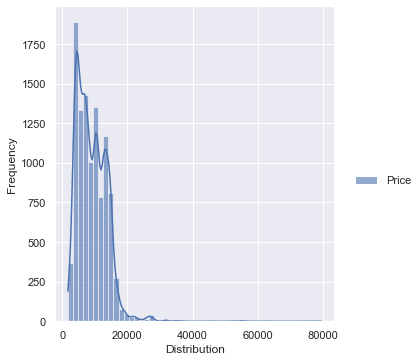

In [56]:
sns.set(color_codes=True)
sns.set(rc={"figure.figsize":(50,20)})
axis = sns.displot(flights_df[["Price"]], bins=50, kde=True, alpha=0.6)
axis.set(xlabel="Distribution", ylabel="Frequency")

In [57]:
flights_df["Price"].skew()
flights_df["Price"].kurt()

13.3019367653792

Time Serie Analysis:

flights_df

In [84]:
flight_tsa = flights_df.sort_values(by="Departure_date", ascending=True)
date_price_df = flight_tsa.loc[:,["Departure_date", "Price", "Airline"]].set_index("Departure_date")

In [91]:
df1 = flight_tsa.loc[:,["Departure_date","Price", "Duration_minutes", "Price_per_minute"]]
df1 = df1.set_index("Departure_date")


In [92]:
df1["Month"] = df1.index.month
df1["Week"] = df1.index.isocalendar().week
df1

,Price,Duration_minutes,Price_per_minute,Month,Week
Departure_date,,,,,
2019-03-01 00:20:00,23170,910.0,25.461538,3,9
2019-03-01 00:20:00,29528,780.0,37.856410,3,9
2019-03-01 00:30:00,12599,1405.0,8.967260,3,9
2019-03-01 00:30:00,14752,1200.0,12.293333,3,9
2019-03-01 02:30:00,16000,90.0,177.777778,3,9
...,...,...,...,...,...
2019-06-27 23:05:00,12819,1195.0,10.727197,6,26
2019-06-27 23:05:00,11150,1195.0,9.330544,6,26
2019-06-27 23:30:00,3943,170.0,23.194118,6,26


In [ ]:
df1 = df1.groupby(pd.Grouper(freq='W'))[["Price", "Duration_minutes", "Price_per_minute"]]
df1

TypeError: 'AxesSubplot' object is not iterable

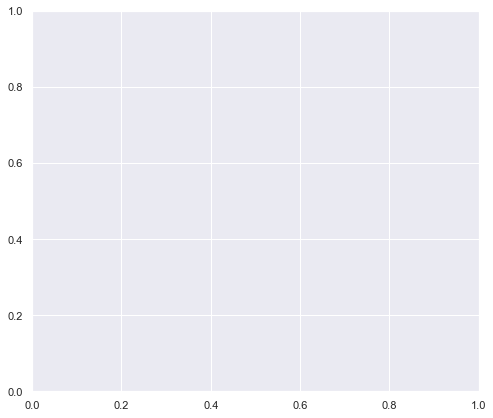

In [94]:
fg, axes = plt.subplots(1,1, figsize=(8,7),sharex=True)
for name, ax in zip(["Price"], axes):
    sns.boxplot(data=df1, x="Month" ,y=name, ax=ax)
    ax.set_title(name)
    if ax !=axes[-1]:
        ax.set_xlabel("")


<AxesSubplot:xlabel='Week', ylabel='Price'>

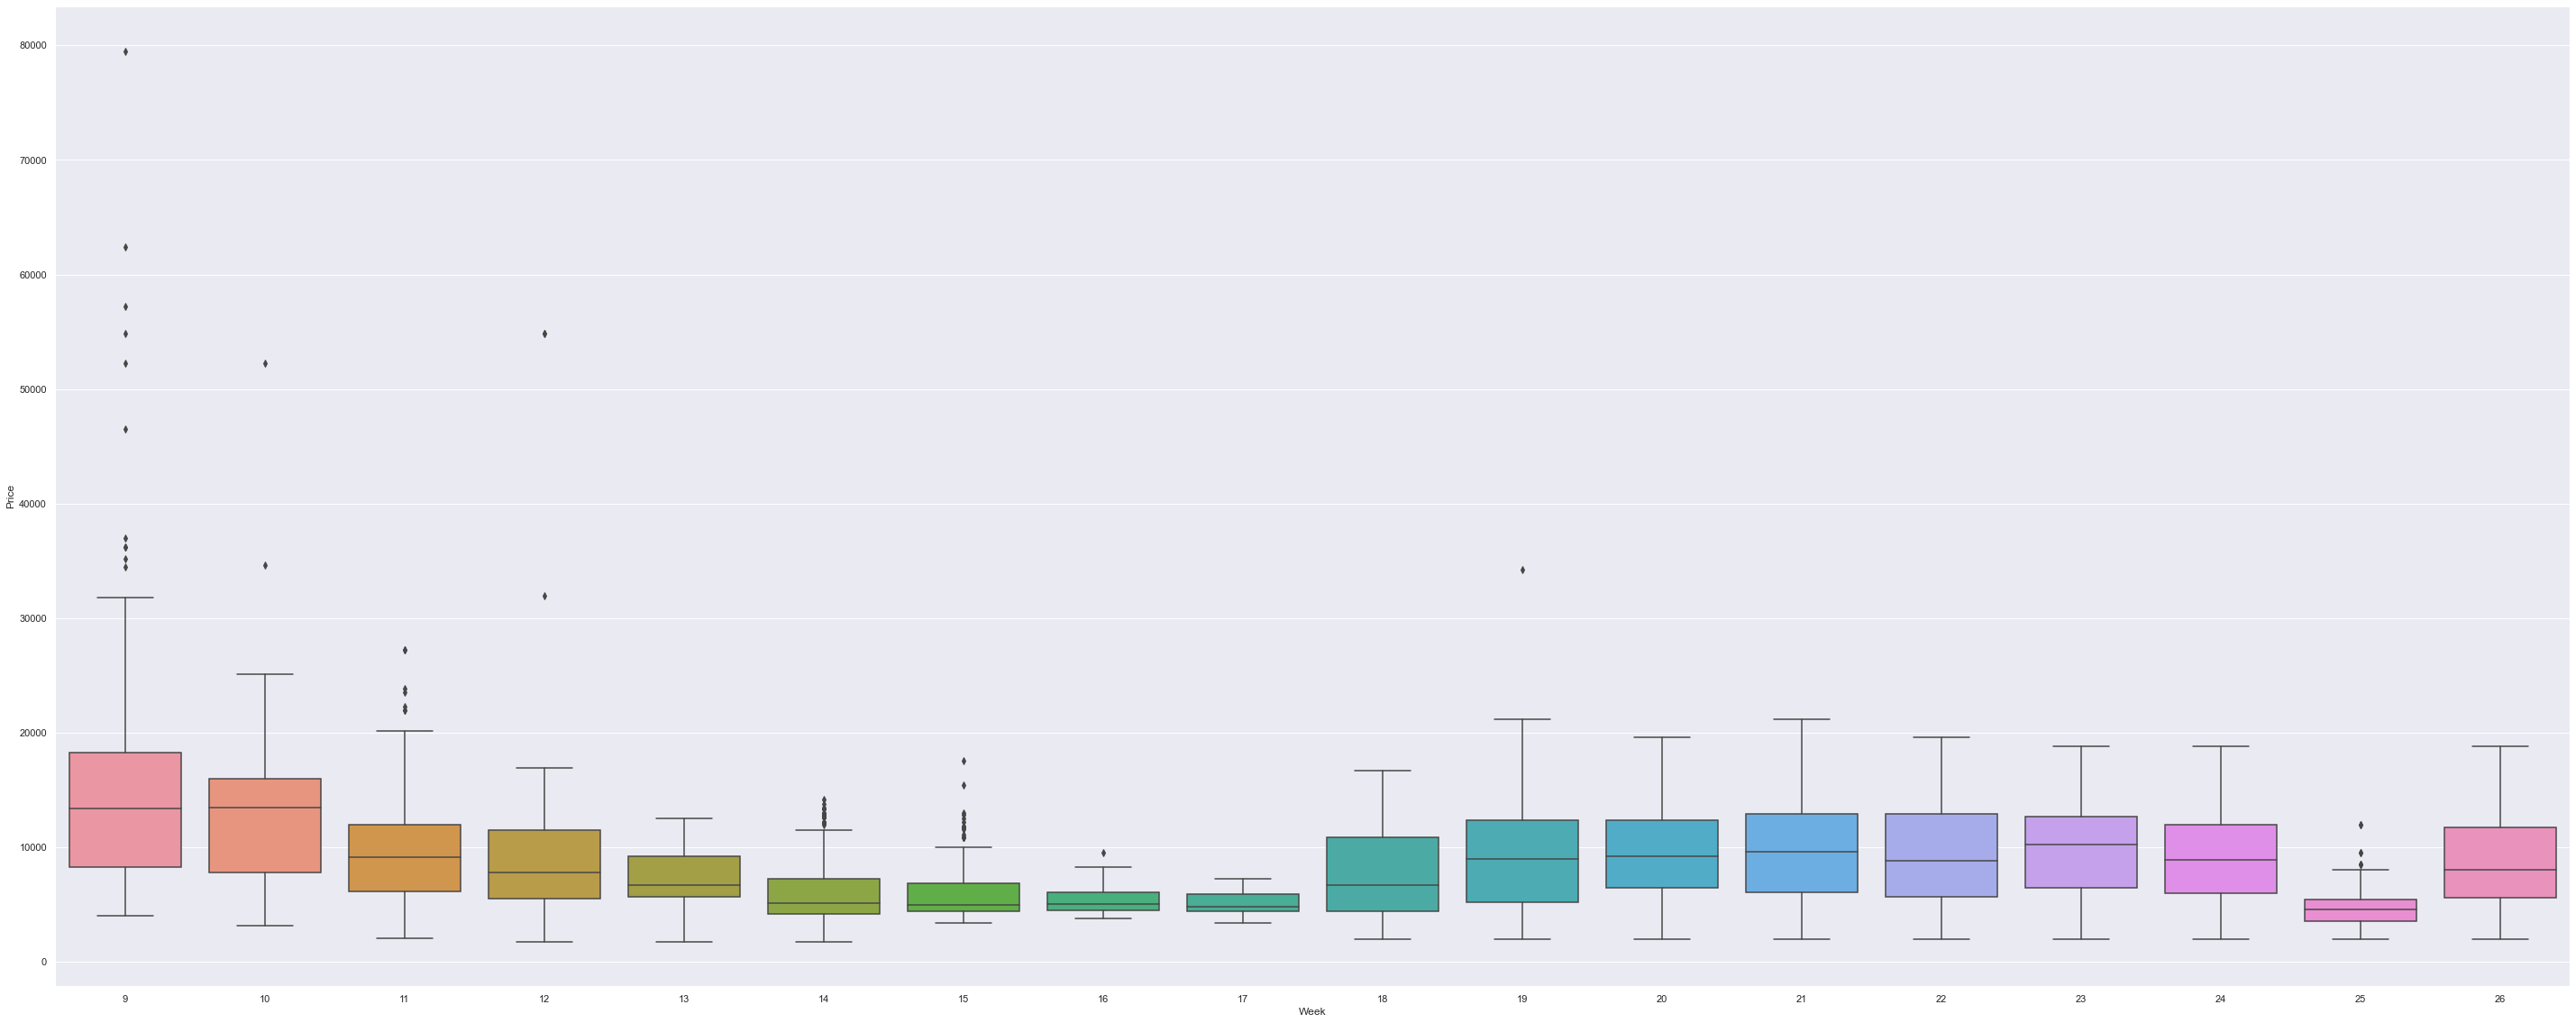

In [97]:
sns.boxplot(data=df1, x="Week" ,y="Price")
#ax.set_title("Price")

In [119]:
df1["Day"] = df1.index.days_in_month
df1.groupby(["Week"])["Price"].describe()


,count,mean,std,min,25%,50%,75%,max
Week,,,,,,,,
9,514.0,14931.208171,8576.518484,4050.0,8266.25,13374.5,18277.75,79512.0
10,705.0,12440.478014,5032.173736,3175.0,7817.00,13502.0,15974.00,52285.0
11,304.0,9225.457237,4244.552799,2050.0,6138.00,9134.0,11981.00,27210.0
12,902.0,8436.284922,4244.151581,1759.0,5557.25,7832.0,11482.00,54826.0
13,299.0,7406.575251,2885.754499,1759.0,5678.00,6681.0,9254.00,12537.0
14,467.0,6163.109208,2828.768381,1759.0,4226.00,5162.0,7229.00,14151.0
15,188.0,6014.292553,2457.563568,3419.0,4409.00,4990.5,6855.00,17531.0
16,238.0,5341.680672,1071.846421,3809.0,4483.00,5050.0,6114.25,9564.0
17,186.0,5089.059140,1012.380434,3383.0,4423.00,4823.0,5908.75,7229.0


Afectando a las varaibles de destino, Fecha, combinaciones y tipo de servicio, se encuentra otra variable que se encuentra oculta en este dataset pero que a la hora de intentar explicar que genera el precio le da el sentido a las demas, esa es la demanda. Si tuvieramos el dato de cuanto es una demanda hipotetica para cada vuelo, la cual se relacionaria intrinsecamente con las variables anteriormente expuestas podriamos inferir que del accionar de dicha variable podriamos obtener informacion que nos ayude a explicar en mayor medida el precio.

La demanda es quien detras de las demas variables indica por que un destino genera un mayor precio que otro, por que para el mismo destino, ademas de otras variables, el precio puede ser distinto, por que para determinada fecha el precio se incrementa o disminuye.

Analizando y modelizando la variable del precio. Podemos entender que el mismo se comporta por dos componentes, uno que refleja el recupero de costos y gastos, y otro que refleja la rentabilidad anidada a cada precio. Por ende, algunas variables como la duracion del viaje, se correlaciona en un 40% con el precio,si bien no impulsa al mismo, si se encuentra ese costo asociado a mantener un avion mas tiempo en el aire.

por lo que modelizando el desenvolvimiento del precio podriamos inferir que existe un costo y una demanda que terminan de alguna manera moldeando el costo final.
Sin embargo, si bien nosotros conocemos y podriamos inferir que una mayor duracion implica un mayor costo, por ende podriamos llegar a contrastar que la demanda podria explicar como impactan las otras variables en el precio.

La otra variable que impacta en el modelo es la aerolinea, la pregunta es si la misma incide en el precio.